# Support Vector Machines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("FinalData.csv")

In [6]:
data.shape

(4410, 62)

In [7]:
data.head()

,Department_Sales,Department_Research&Development,Department_HumanResources,EducationField_LifeSciences,EducationField_Other,EducationField_Medical,EducationField_Marketing,EducationField_TechnicalDegree,EducationField_HumanResources,JobRole_HealthcareRepresentative,...,PercentSalaryHike,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Travel,Frequently,Female,Attrition1,Attrition2
0,1,0,0,1,0,0,0,0,0,1,...,0.000000,1.000000,0.025,0.000000,0.000000,1,0,1,-1,0
1,0,1,0,1,0,0,0,0,0,0,...,0.857143,0.500000,0.125,0.066667,0.235294,1,1,1,1,1
2,0,1,0,0,1,0,0,0,0,0,...,0.285714,0.333333,0.125,0.000000,0.176471,1,1,0,-1,0
3,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.833333,0.200,0.466667,0.294118,0,0,0,-1,0
4,0,1,0,0,0,1,0,0,0,0,...,0.071429,0.333333,0.150,0.000000,0.235294,1,0,0,-1,0


In [31]:
y = data['Attrition1']
X = data.drop('Attrition1', axis=1)
X = X.drop('Attrition2', axis=1)

In [32]:
print(y)

0      -1
1       1
2      -1
3      -1
4      -1
5      -1
6       1
7      -1
8      -1
9      -1
10     -1
11     -1
12     -1
13      1
14     -1
15     -1
16     -1
17     -1
18     -1
19     -1
20     -1
21     -1
22     -1
23     -1
24     -1
25     -1
26     -1
27     -1
28      1
29     -1
       ..
4380   -1
4381    1
4382   -1
4383   -1
4384   -1
4385   -1
4386    1
4387   -1
4388    1
4389   -1
4390   -1
4391    1
4392   -1
4393   -1
4394   -1
4395   -1
4396   -1
4397   -1
4398   -1
4399   -1
4400   -1
4401   -1
4402    1
4403   -1
4404   -1
4405   -1
4406   -1
4407   -1
4408   -1
4409   -1
Name: Attrition1, Length: 4410, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

0       0.000000
1       0.066667
2       0.000000
3       0.466667
4       0.000000
5       0.466667
6       0.000000
7       0.000000
8       0.466667
9       0.066667
10      0.266667
11      0.666667
12      0.266667
13      0.600000
14      0.000000
15      0.000000
16      0.066667
17      0.000000
18      0.400000
19      0.466667
20      0.066667
21      0.066667
22      0.066667
23      0.733333
24      0.000000
25      0.000000
26      0.200000
27      0.333333
28      0.000000
29      0.066667
          ...   
4380    0.000000
4381    0.000000
4382    0.133333
4383    0.733333
4384    0.133333
4385    0.000000
4386    0.000000
4387    0.066667
4388    0.066667
4389    1.000000
4390    0.066667
4391    0.066667
4392    0.066667
4393    0.133333
4394    0.000000
4395    0.266667
4396    0.066667
4397    0.133333
4398    0.000000
4399    0.333333
4400    0.000000
4401    0.000000
4402    0.000000
4403    0.733333
4404    0.066667
4405    0.000000
4406    0.000000
4407    0.0666

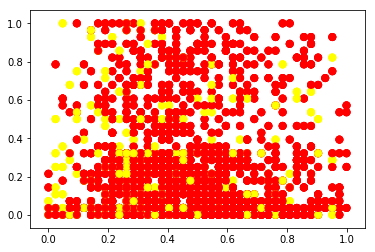

In [48]:

plt.scatter(X['Age'],X['DistanceFromHome'], c=y, s=50, cmap='autumn');

In [50]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
y_pred = svclassifier.predict(X_test)
y_pred2= classifier.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[737   0]
 [145   0]]
             precision    recall  f1-score   support

         -1       0.84      1.00      0.91       737
          1       0.00      0.00      0.00       145

avg / total       0.70      0.84      0.76       882



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test2, y_pred))
print(classification_report(y_test2, y_pred))